# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city.replace(' ', '+')}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | redencao
Processing Record 6 of Set 1 | severodvinsk
Processing Record 7 of Set 1 | cacoal
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | akureyri
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | pariyapuram
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | kitimat
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | new plymouth
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | ta`u
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,95,100,1.34,NZ,1689975248
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689975248
2,thompson,55.7435,-97.8558,20.09,77,75,3.60,CA,1689975248
3,longyearbyen,78.2186,15.6401,6.91,81,100,5.66,SJ,1689975249
4,redencao,-4.2258,-38.7306,22.77,76,16,1.26,BR,1689975249


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,95,100,1.34,NZ,1689975248
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689975248
2,thompson,55.7435,-97.8558,20.09,77,75,3.60,CA,1689975248
3,longyearbyen,78.2186,15.6401,6.91,81,100,5.66,SJ,1689975249
4,redencao,-4.2258,-38.7306,22.77,76,16,1.26,BR,1689975249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

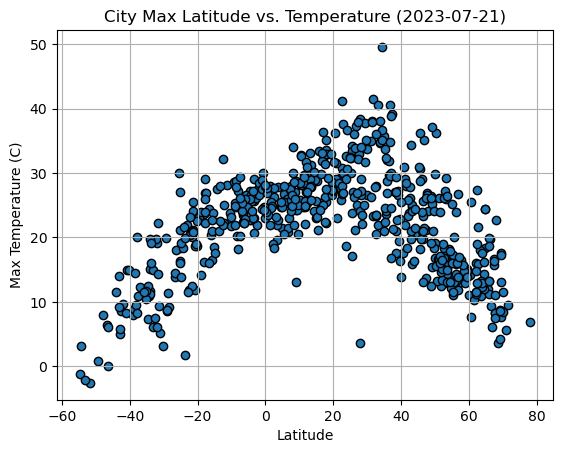

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

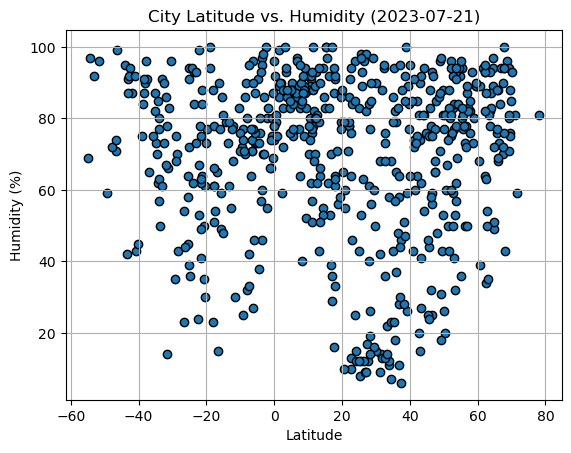

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

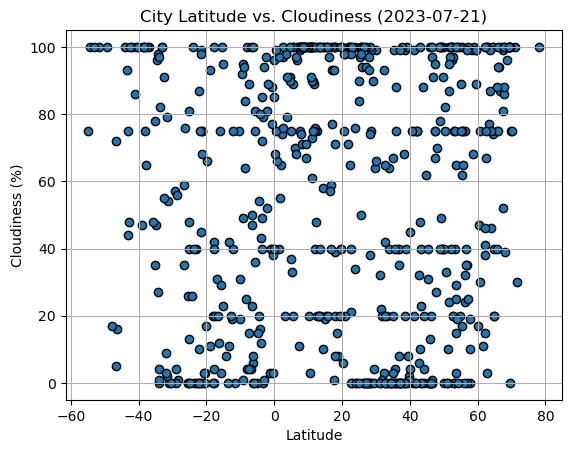

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

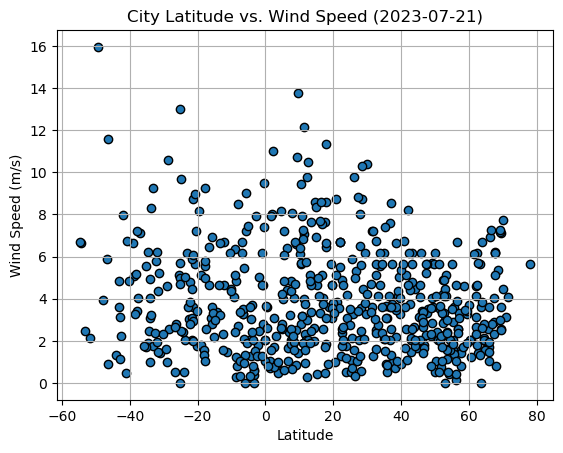

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # Calculate and print the r-value (correlation coefficient)
    print(f"The r-value is: {rvalue**2}")

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,20.09,77,75,3.60,CA,1689975248
3,longyearbyen,78.2186,15.6401,6.91,81,100,5.66,SJ,1689975249
5,severodvinsk,64.5635,39.8302,14.29,97,74,2.12,RU,1689975249
7,aasiaat,68.7098,-52.8699,3.65,96,96,5.37,GL,1689975249
8,akureyri,65.6835,-18.0878,11.96,76,75,2.57,IS,1689975250


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,95,100,1.34,NZ,1689975248
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689975248
4,redencao,-4.2258,-38.7306,22.77,76,16,1.26,BR,1689975249
6,cacoal,-11.4386,-61.4472,28.09,30,0,1.45,BR,1689975249
9,puerto ayora,-0.7393,-90.3518,29.98,75,77,4.63,EC,1689974734


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3382440553674849


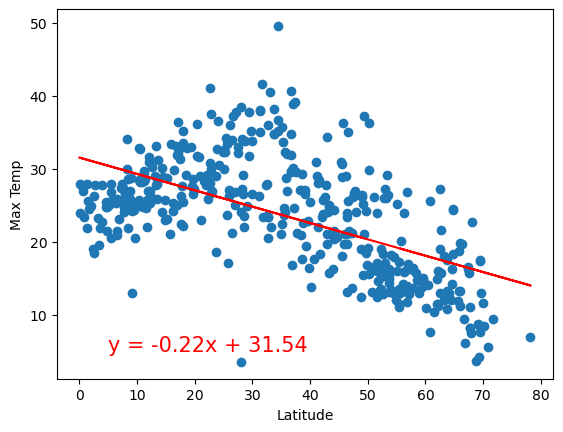

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (5, 5))

# # Linear regression on Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 45  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 10
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.show()

The r-value is: 0.6963866201441734


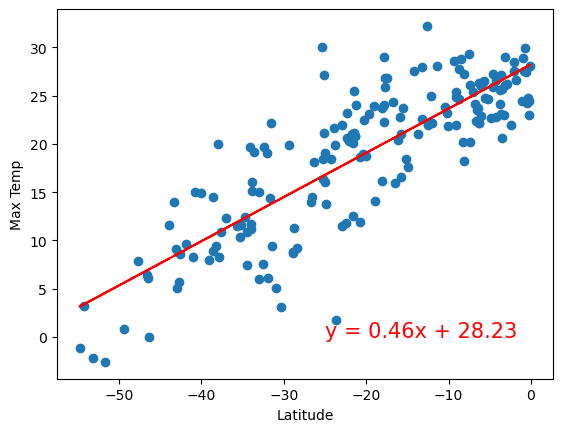

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (-25, 0))


# # Linear regression on Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 5  # Change the 5 to adjust the x-coordinate
# y_pos = y_values.max() - 10
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.show()

**Discussion about the linear relationship:** The analysis of the relationship between maximum temperature (Max Temp) and latitude in both the Northern and Southern Hemispheres reveals clear patterns. In the Northern Hemisphere, temperatures decrease significantly as we move away from the equator towards higher latitudes, demonstrating a strong negative linear relationship. Conversely, in the Southern Hemisphere, temperatures generally increase as we approach the equator, indicating a weaker positive association.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00031892426743184403


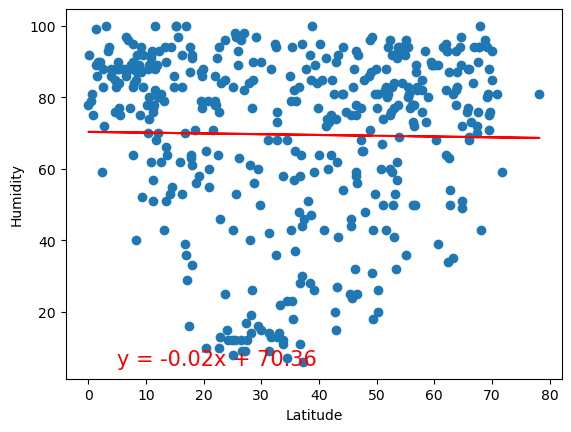

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (5,5))


# # Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 45  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 90
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.show()

The r-value is: 0.006184587589659314


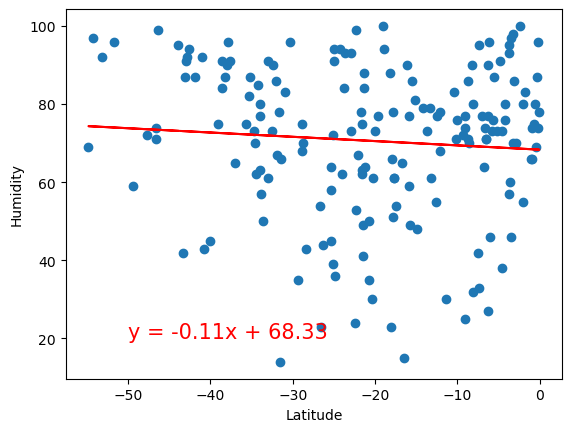

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

# # Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 5  # Change the 5 to adjust the x-coordinate
# y_pos = y_values.max() - 90
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.show()

**Discussion about the linear relationship:** 
The analysis of the relationship between humidity and latitude in both the Northern and Southern Hemispheres reveals distinct trends. In the Northern Hemisphere, there is a weak positive relationship, indicating a slight increase in humidity as we move away from the equator towards higher latitudes. However, this positive association is not very strong, as shown by a relatively low positive correlation coefficient (r-value). In the Southern Hemisphere, there is a slightly stronger negative relationship, suggesting a slight decrease in humidity as we approach the equator. Nevertheless, this negative association is also not very strong, as indicated by a relatively low negative correlation coefficient. These humidity patterns are influenced by various factors, including regional weather conditions, proximity to water bodies, and atmospheric circulation, leading to different humidity trends in each hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011785787591583895


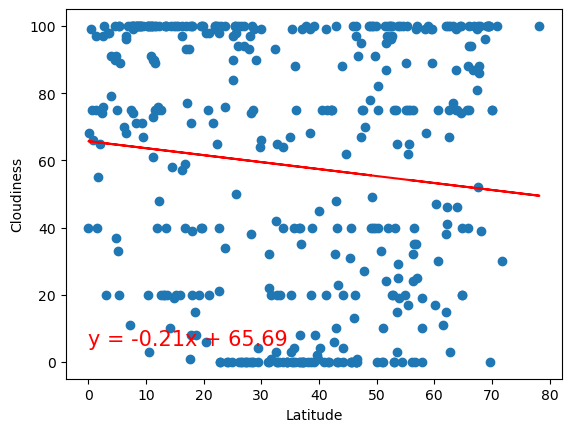

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (0,5))

# # Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 45  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 90
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.show()

The r-value is: 0.038918548083999575


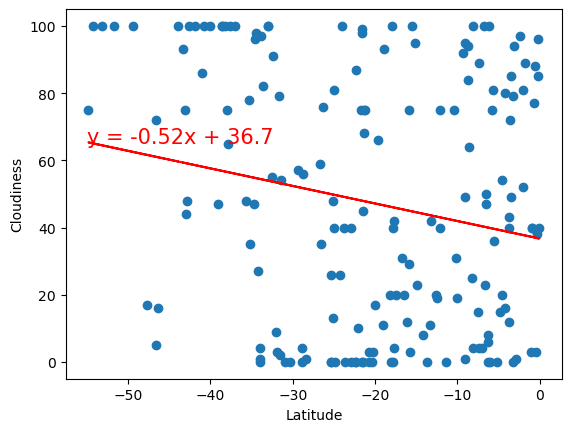

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 65))

# # Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 0  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 50
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.show()

**Discussion about the linear relationship:** The examination of the linear relationship between cloudiness and latitude in both the Northern and Southern Hemispheres reveals interesting findings. In the Northern Hemisphere, there is a weak positive correlation, indicating a slight tendency for cloudiness to increase as we move away from the equator towards higher latitudes. However, this positive association is not highly pronounced, as the correlation coefficient (r-value) is relatively low. Conversely, in the Southern Hemisphere, there is a slightly stronger positive correlation, suggesting a slight increase in cloudiness as we approach the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.020511389997723034


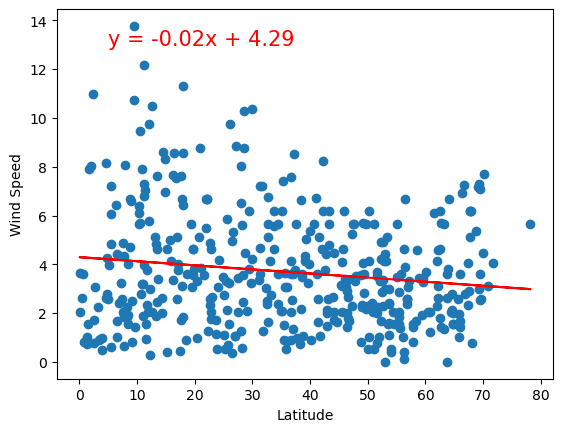

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (5, 13))

# # Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 45  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 2
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# plt.show()

The r-value is: 0.03402606862166005


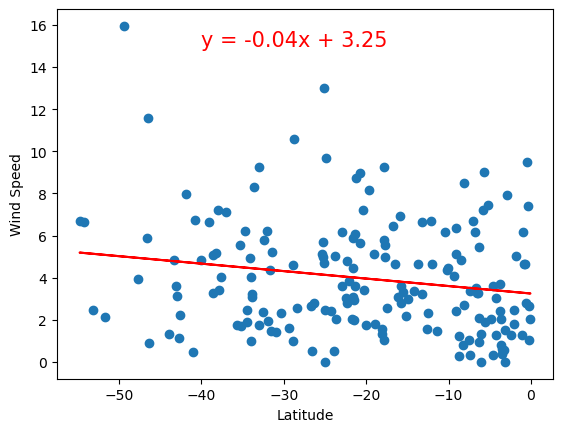

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (-40, 15))


# # Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Calculate the correlation coefficient (r-value) for Northern Hemisphere
# correlation_coefficient, _ = st.pearsonr(x_values, y_values)
# print(f"The r-value is: {correlation_coefficient}")

# # Find the position for annotation within the data range
# x_pos = x_values.min() + 25  # Change the 45 to adjust the x-coordinate
# y_pos = y_values.max() - 2
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# plt.show()

**Discussion about the linear relationship:** The examination of the linear relationship between wind speed and latitude in both the Northern and Southern Hemispheres reveals distinct characteristics. In the Northern Hemisphere, there is a weak negative correlation, indicating a slight decrease in wind speed as we move away from the equator towards higher latitudes. However, this negative relationship is not particularly strong, as evidenced by a relatively low correlation coefficient (r-value). Conversely, in the Southern Hemisphere, there is a slightly stronger positive correlation, suggesting a slight increase in wind speed as we approach the equator. Nonetheless, similar to the Northern Hemisphere, this positive association is not highly pronounced, as indicated by a relatively low correlation coefficient. 